In [64]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('boxdata.csv')

# Understanding the data

In [65]:
df.head()

,Cost,Weight,Weight1,Length,Height,Width
0,242.0,23.2,25.4,30.0,11.5200,4.0200
1,290.0,24.0,26.3,31.2,12.4800,4.3056
2,340.0,23.9,26.5,31.1,12.3778,4.6961
3,363.0,26.3,29.0,33.5,12.7300,4.4555
4,430.0,26.5,29.0,34.0,12.4440,5.1340


In [66]:
df.tail()

,Cost,Weight,Weight1,Length,Height,Width
154,12.2,11.5,12.2,13.4,2.0904,1.3936
155,13.4,11.7,12.4,13.5,2.4300,1.2690
156,12.2,12.1,13.0,13.8,2.2770,1.2558
157,19.7,13.2,14.3,15.2,2.8728,2.0672
158,19.9,13.8,15.0,16.2,2.9322,1.8792


In [67]:
df.shape

(159, 6)

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Cost     159 non-null    float64
 1   Weight   159 non-null    float64
 2   Weight1  159 non-null    float64
 3   Length   159 non-null    float64
 4   Height   159 non-null    float64
 5   Width    159 non-null    float64
dtypes: float64(6)
memory usage: 7.6 KB


In [69]:
df.describe()

,Cost,Weight,Weight1,Length,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [70]:
df.nunique()

Cost       101
Weight     116
Weight1     93
Length     124
Height     154
Width      152
dtype: int64

***

# Handling missing values

In [71]:
df.isnull().sum()

Cost       0
Weight     0
Weight1    0
Length     0
Height     0
Width      0
dtype: int64

**Since there are no missing values, moving to next step**

***

# Handling outliers

**Define a function to remove outliers**

In [72]:
def removeOutliers(df, featureVariable) :
    print("Old Shape: ", df.shape)
    # IQR
    # Calculate the upper and lower limits
    Q1 = df[featureVariable].quantile(0.25)
    Q3 = df[featureVariable].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
    
    upper_array = np.array(df[featureVariable] >= upper)
    lower_array = np.array(df[featureVariable] <= lower)
    
    print("Upper limit: ", upper)
    print("No. of datapoints greater than upper limit: ", upper_array.sum())
    
    print("Lower limit: ", lower)
    print("No. of datapoints less than lower limit: ", lower_array.sum())
    
    upper_array = np.where(df[featureVariable] >= upper)[0]
    lower_array = np.where(df[featureVariable] <= lower)[0]
     
    df.drop(index=upper_array, inplace=True)
    df.drop(index=lower_array, inplace=True)
     
    # Print the new shape of the DataFrame
    print("New Shape: ", df.shape)
    return df

**Take column 'Weight' and analyse the outliers**

<Axes: ylabel='Weight'>

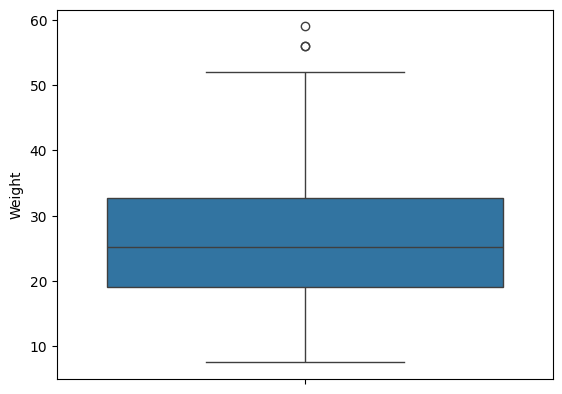

In [73]:
sns.boxplot(df['Weight'])

**From the above plot we can see that values greater than 53 and values below 0 are outliers. Lets remove the same using the IQR method**

In [74]:
df = removeOutliers(df,'Weight')

Old Shape:  (159, 6)
Upper limit:  53.175000000000004
No. of datapoints greater than upper limit:  3
Lower limit:  -1.4250000000000007
No. of datapoints less than lower limit:  0
New Shape:  (156, 6)


**Lets analyse and remove outliers from other feature variables too**

**Take column 'Weight1' and analyse the outliers**

<Axes: ylabel='Weight1'>

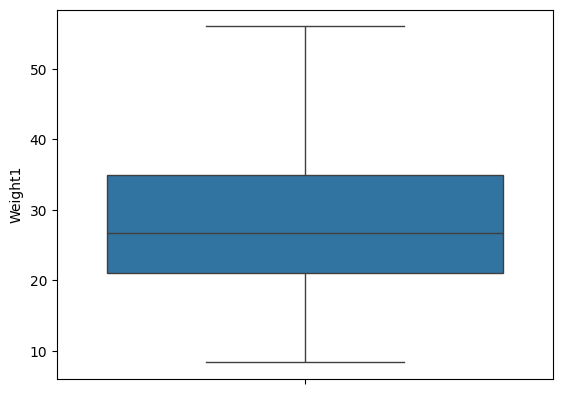

In [75]:
sns.boxplot(df['Weight1'])

**From the above plot we can see that values greater than around 55 and values below 1 are outliers. Lets remove the same using the IQR method.**

In [76]:
df = removeOutliers(df,'Weight1')

Old Shape:  (156, 6)
Upper limit:  56.0
No. of datapoints greater than upper limit:  1
Lower limit:  0.0
No. of datapoints less than lower limit:  0
New Shape:  (155, 6)


**Take column 'Length' and analyse the outliers**

<Axes: ylabel='Length'>

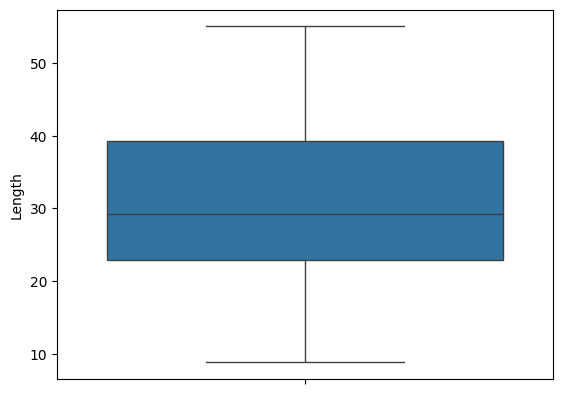

In [77]:
sns.boxplot(df['Length'])

**From the above plot we can see that values greater than around 60 and values below 1 are outliers. Lets remove the same using the IQR method.**

In [78]:
df = removeOutliers(df,'Length')

Old Shape:  (155, 6)
Upper limit:  63.94999999999998
No. of datapoints greater than upper limit:  0
Lower limit:  -1.6499999999999844
No. of datapoints less than lower limit:  0
New Shape:  (155, 6)


**Take column 'Height' and analyse the outliers**

<Axes: ylabel='Height'>

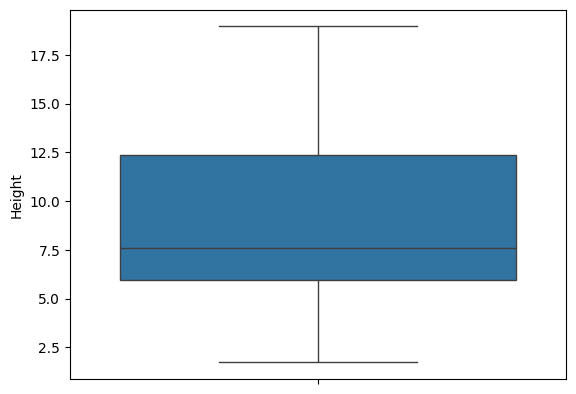

In [79]:
sns.boxplot(df['Height'])

**From the above plot we can see that values greater than around 21 and values below 2 are outliers.Lets remove the same using the IQR method.**

In [80]:
df = removeOutliers(df,'Height')

Old Shape:  (155, 6)
Upper limit:  22.057825
No. of datapoints greater than upper limit:  0
Lower limit:  -3.7515750000000008
No. of datapoints less than lower limit:  0
New Shape:  (155, 6)


**Take column 'Width' and analyse the outliers**

<Axes: ylabel='Width'>

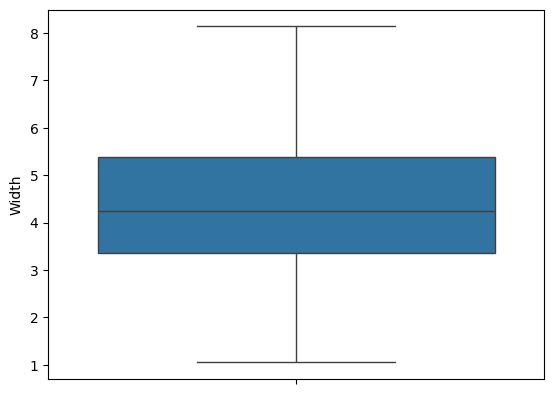

In [81]:
sns.boxplot(df['Width'])

**From the above plot we can see that values greater than around 10 and values below 0 are outliers.Lets remove the same using the IQR method.**

In [82]:
df = removeOutliers(df,'Width')

Old Shape:  (155, 6)
Upper limit:  8.387600000000003
No. of datapoints greater than upper limit:  0
Lower limit:  0.34919999999999884
No. of datapoints less than lower limit:  0
New Shape:  (155, 6)


**The final shape of our data after removing outliers is (155,6)**

***

# Relationship analysis

In [83]:
df.corr()

,Cost,Weight,Weight1,Length,Height,Width
Cost,1.000000,0.890173,0.894415,0.902576,0.815237,0.925664
Weight,0.890173,1.000000,0.999385,0.990205,0.688050,0.891260
Weight1,0.894415,0.999385,1.000000,0.992765,0.704041,0.897855
Length,0.902576,0.990205,0.992765,1.000000,0.768038,0.898315
Height,0.815237,0.688050,0.704041,0.768038,1.000000,0.803268
Width,0.925664,0.891260,0.897855,0.898315,0.803268,1.000000


<Axes: >

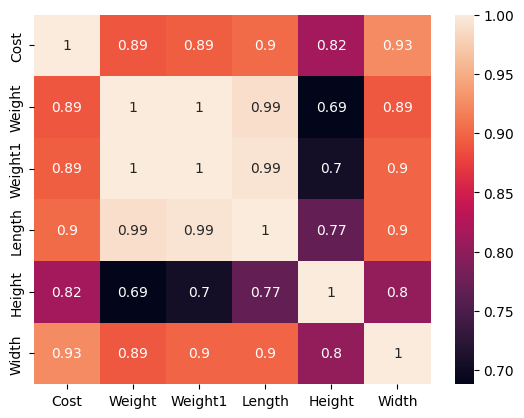

In [84]:
corelation = df.corr()
sns.heatmap(corelation, xticklabels=corelation.columns, yticklabels=corelation.columns, annot=True)

**From the above plot we could see weight and weight1 are highly correlated.Next highest correlation is between weight vs length and weight1 vs length.**

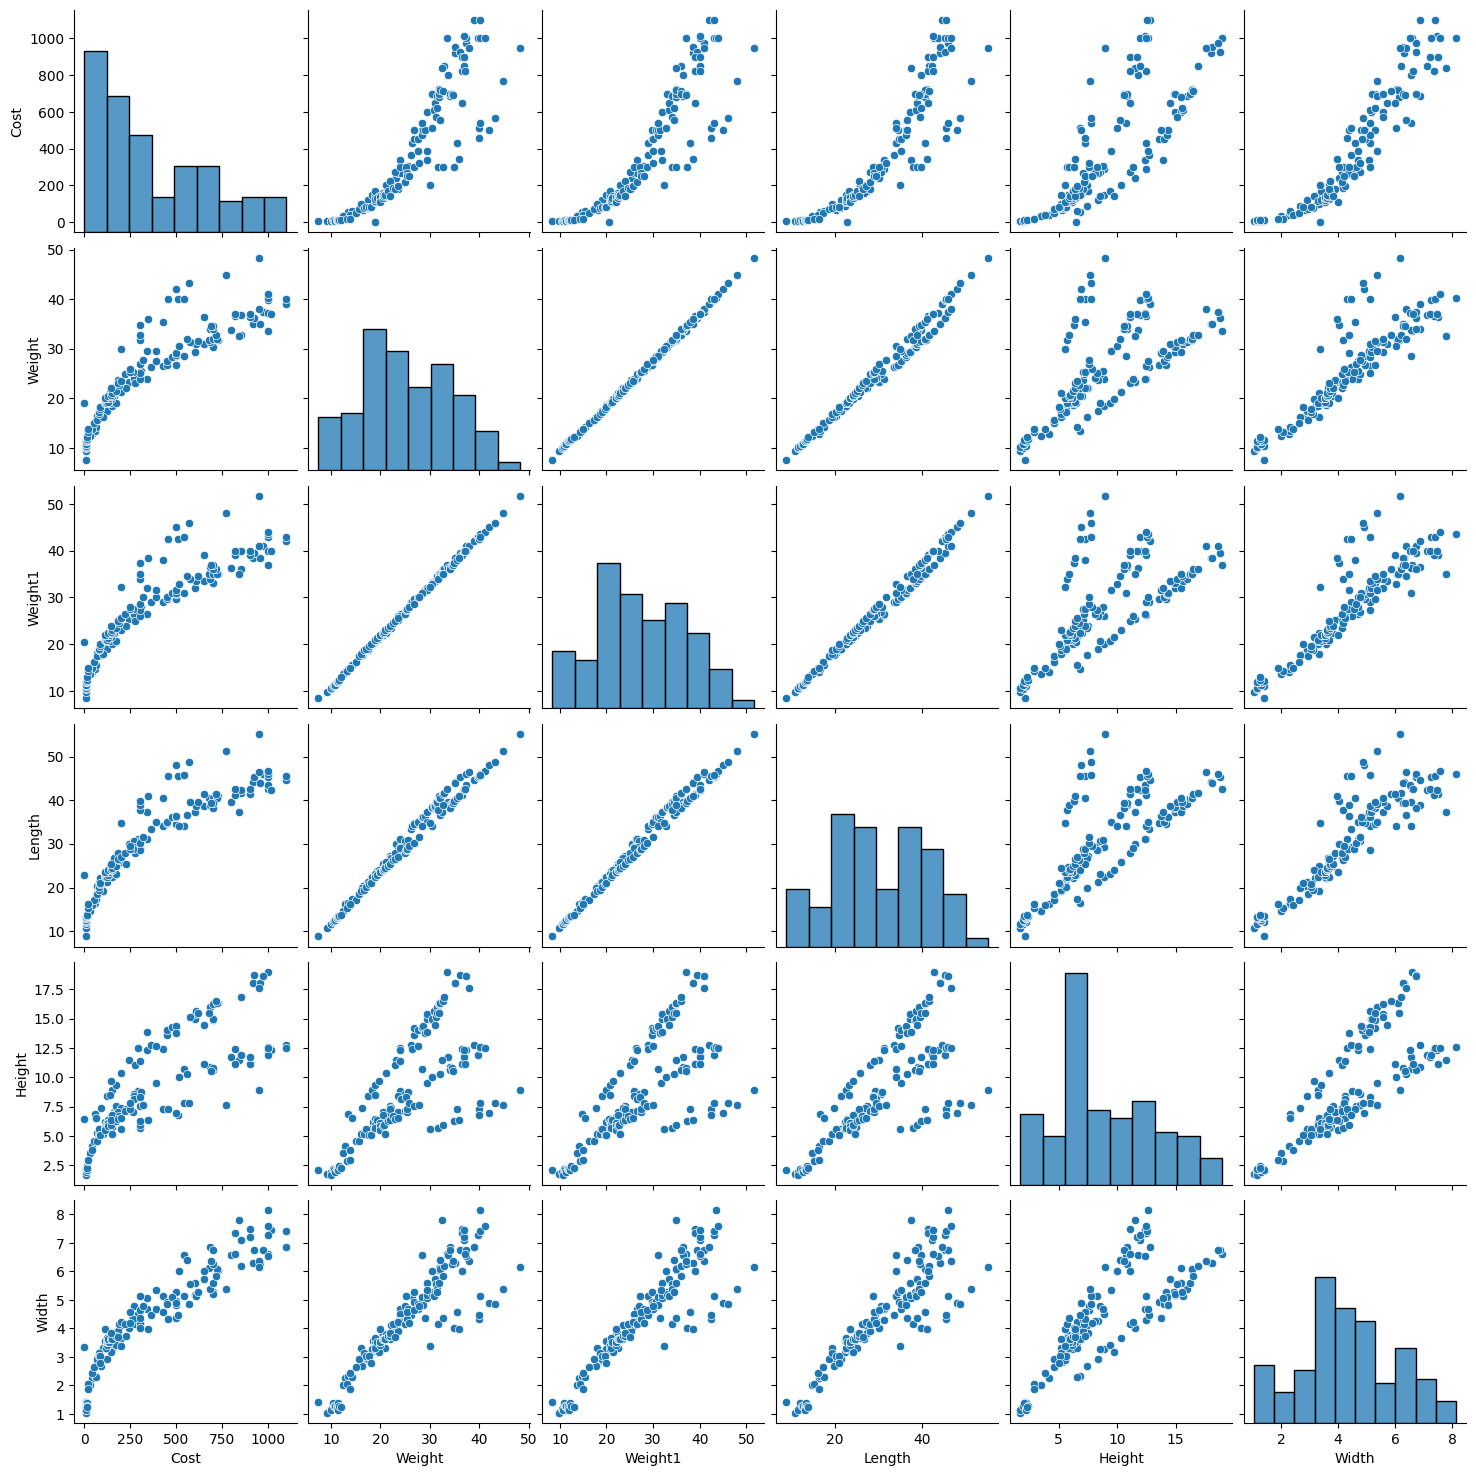

In [85]:
sns.pairplot(df)

**Lets plot reg plot between all the columns to visualize better**

<Axes: xlabel='Weight', ylabel='Weight1'>

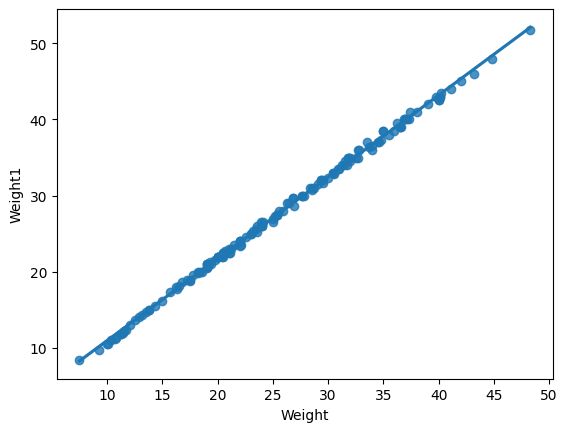

In [86]:
sns.regplot(x="Weight", y="Weight1", data=df)

<Axes: xlabel='Weight', ylabel='Length'>

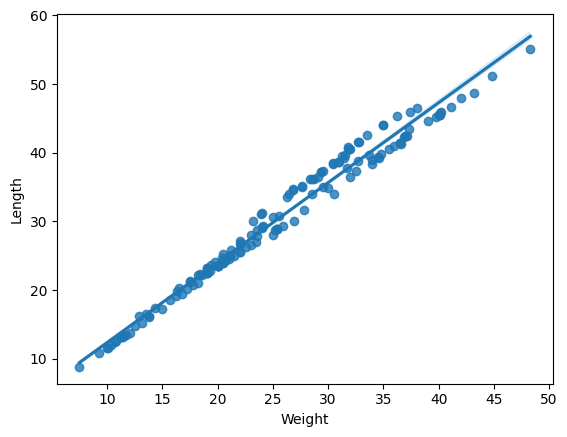

In [87]:
sns.regplot(x="Weight", y="Length", data=df)

<Axes: xlabel='Weight', ylabel='Height'>

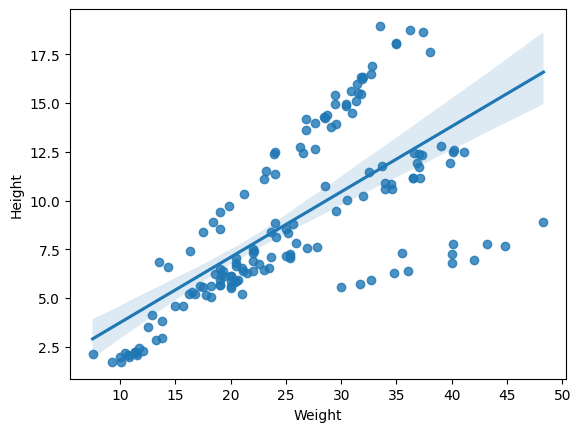

In [88]:
sns.regplot(x="Weight", y="Height", data=df)

<Axes: xlabel='Weight', ylabel='Width'>

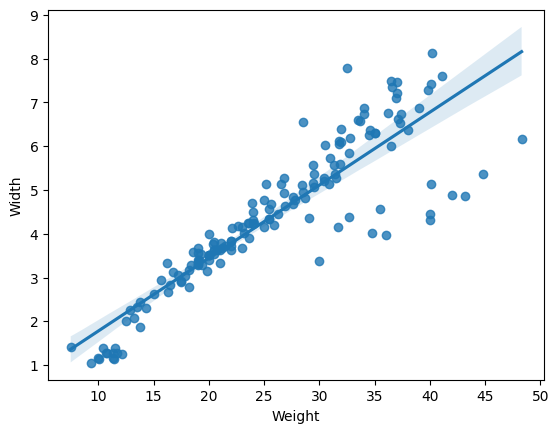

In [89]:
sns.regplot(x="Weight", y="Width", data=df)

<Axes: xlabel='Weight1', ylabel='Length'>

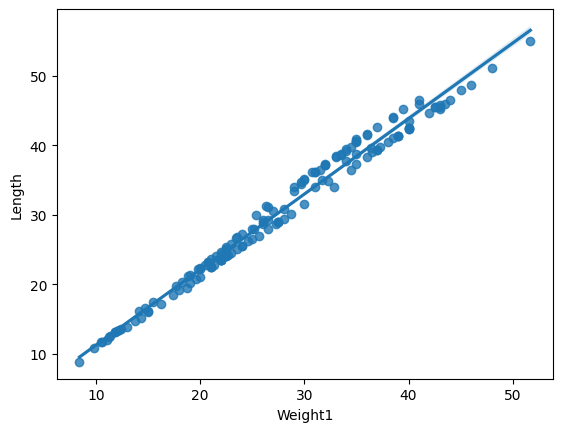

In [90]:
sns.regplot(x="Weight1", y="Length", data=df)

<Axes: xlabel='Weight1', ylabel='Height'>

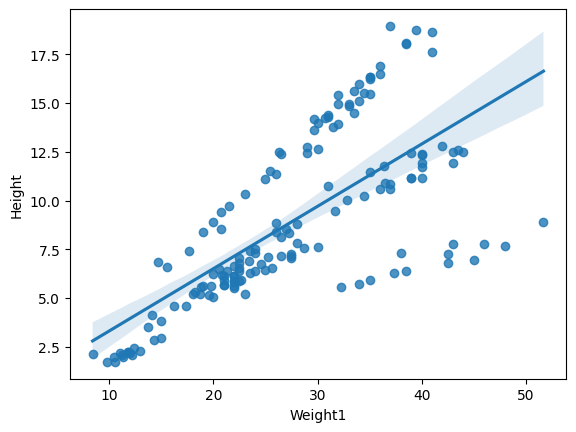

In [91]:
sns.regplot(x="Weight1", y="Height", data=df)

<Axes: xlabel='Weight1', ylabel='Width'>

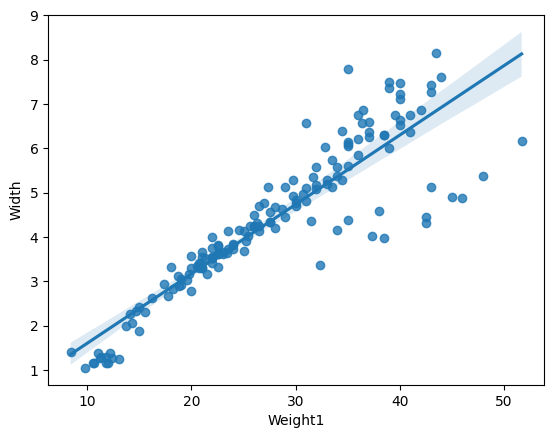

In [92]:
sns.regplot(x="Weight1", y="Width", data=df)

<Axes: xlabel='Length', ylabel='Height'>

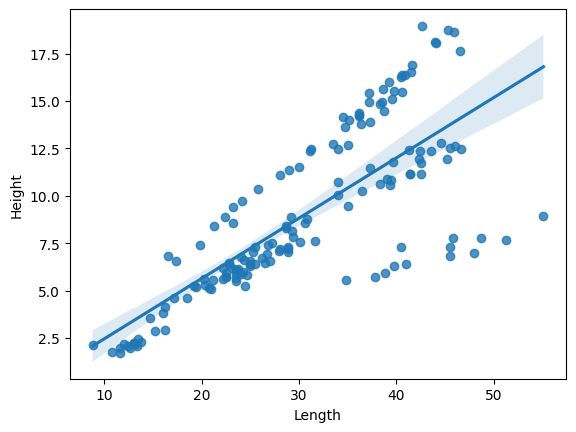

In [93]:
sns.regplot(x="Length", y="Height", data=df)

<Axes: xlabel='Length', ylabel='Width'>

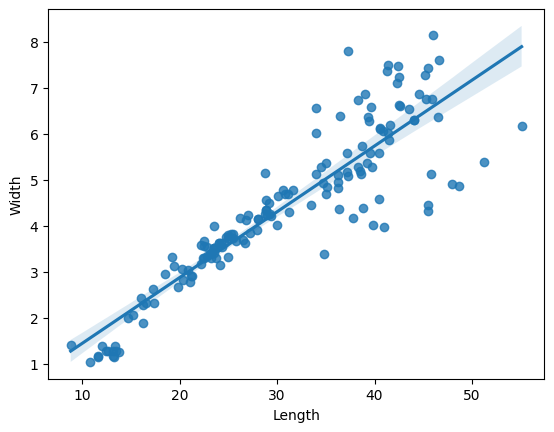

In [94]:
sns.regplot(x="Length", y="Width", data=df)

<Axes: xlabel='Width', ylabel='Height'>

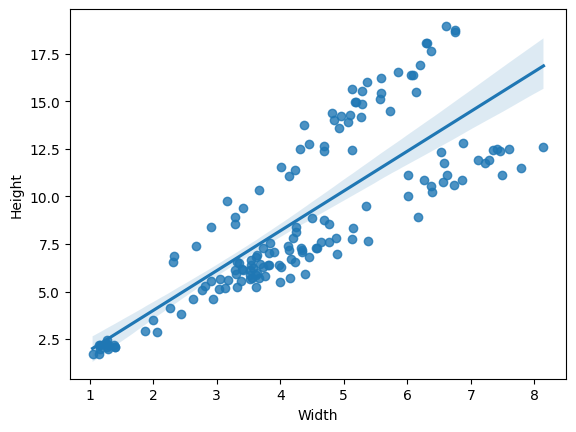

In [95]:
sns.regplot(x="Width", y="Height", data=df)

#### From the above plots we can finalize that Weight and Weight1 are highly correlated.
#### Highly correlated predictors can lead to collinearity issues and this can greatly affect the model performance.So it is better to remove one of them.

#### According to the given definition Weight is the weight of the bag and Weight1 is the weight, the bag can carry after expansion.Logically a cost of the bag is highly dependant on the number of items the bag can carry. If a bag can carry many items then the cost should be high and vice versa.
#### So we can drop weight and include only weight1.

In [96]:
df.drop('Weight', axis=1, inplace=True)

In [97]:
df.head()

,Cost,Weight1,Length,Height,Width
0,242.0,25.4,30.0,11.5200,4.0200
1,290.0,26.3,31.2,12.4800,4.3056
2,340.0,26.5,31.1,12.3778,4.6961
3,363.0,29.0,33.5,12.7300,4.4555
4,430.0,29.0,34.0,12.4440,5.1340


In [98]:
print(df.shape)

(155, 5)


***

In [99]:
# Split dependant and independant variables
X = df.iloc[:, 1:].values
Y = df.iloc[:, 0].values

# Normalizing the feature variables

In [100]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X=sc.fit_transform(X)

***

**Now that the data is ready we can use it to train the model**

# Model Building

## Multi linear regression model from sklearn (least square errors)

In [101]:
from sklearn.model_selection import train_test_split 

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=1/5, random_state=0)

In [102]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train, Y_train)

LinearRegression()

In [103]:
Y_predicted = model.predict(X_test)

In [104]:
# Compare predicted result with actual value
np.set_printoptions(precision = 2)
result = np.concatenate((Y_predicted.reshape(len(Y_predicted), 1), Y_test.reshape(len(Y_test), 1)), 1)
result

array([[ 698.87,  720.  ],
       [ 216.64,  110.  ],
       [-143.97,   12.2 ],
       [ 778.08,  840.  ],
       [ 670.57,  700.  ],
       [ 454.1 ,  390.  ],
       [ 193.28,  145.  ],
       [ 392.56,  250.  ],
       [ 325.63,  270.  ],
       [ 840.52,  820.  ],
       [ 201.04,  135.  ],
       [ 201.82,  120.  ],
       [ 583.7 ,  500.  ],
       [ 485.78,  390.  ],
       [ 663.71,  556.  ],
       [ 155.37,    0.  ],
       [ 924.52,  975.  ],
       [ -64.06,   19.7 ],
       [ 411.91,  300.  ],
       [ 947.82, 1000.  ],
       [ 298.34,  188.  ],
       [ 501.24,  450.  ],
       [ 635.62,  567.  ],
       [-197.12,    8.7 ],
       [  72.49,   78.  ],
       [ 451.72,  300.  ],
       [-227.51,    6.7 ],
       [  45.72,   55.  ],
       [ 246.85,  170.  ],
       [ 419.79,  300.  ],
       [ 588.71,  700.  ]])

In [105]:
print('Coefficient = ', model.coef_)
print('Intercept = ', model.intercept_)

Coefficient =  [ 533.16 -433.38  137.65   94.68]
Intercept =  374.0732059160682


**Define a function to calculate the metrics**

In [106]:
from sklearn.metrics import mean_squared_error, r2_score
import math
def calculateModelMetrics(Y_actual,Y_predicted) :
    mse = mean_squared_error(Y_actual, Y_predicted)
    rmse = math.sqrt(mse)
    print("Mean squared error = ", mse)
    print("Root Mean squared error = ", rmse)
    print('Variance score = ', r2_score(Y_actual, Y_predicted))

### Model performance metrics

In [107]:
calculateModelMetrics(Y_test, Y_predicted)

Mean squared error =  10692.861023880809
Root Mean squared error =  103.40629102661408
Variance score =  0.8816970799519525


***

## Gradient descent algorithm

**Lets define the needed functions**

In [108]:
# Function to predict y
def predicted_y(coefficients,x,intercept):
    y_predicted=[]
    for i in range(len(x)):
        y_predicted.append(coefficients@x[i]+intercept)
    return np.array(y_predicted)
    

# error function
def error(y,y_predicted):
    n=len(y)
    s=0.0
    for i in range(n):
        s+=(y[i]-y_predicted[i])**2
    return (1/n)*s

#derivative of error w.r.t coefficients
def dldw(x,y,y_predicted):
    s=0.0
    n=len(y)
    for i in range(n):
        s+=-x[i]*(y[i]-y_predicted[i])
    return (2/n)*s
    

# derivative of error w.r.t interceptor
def dldb(y,y_predicted):
    n=len(y)
    s=0.0
    for i in range(len(y)):
        s+=-(y[i]-y_predicted[i])
    return (2/n) * s    
        
# gradient function
def gradient_descent(x,y):
    coefficient_vector=np.random.randn(x.shape[1])
    intercept=0
    epoch = 2000
    n = len(x)
    linear_loss=[]
    learning_rate = 0.001

    for i in range(epoch):
        y_predicted = predicted_y(coefficient_vector,x,intercept)
        coefficient_vector = coefficient_vector - learning_rate *dldw(x,y,y_predicted) 
        intercept = intercept - learning_rate * dldb(y,y_predicted)
        linear_loss.append(error(y,y_predicted))
        
    plt.plot(np.arange(1,epoch),linear_loss[1:])
    plt.xlabel("number of iterations")
    plt.ylabel("error")
    
    return coefficient_vector,intercept

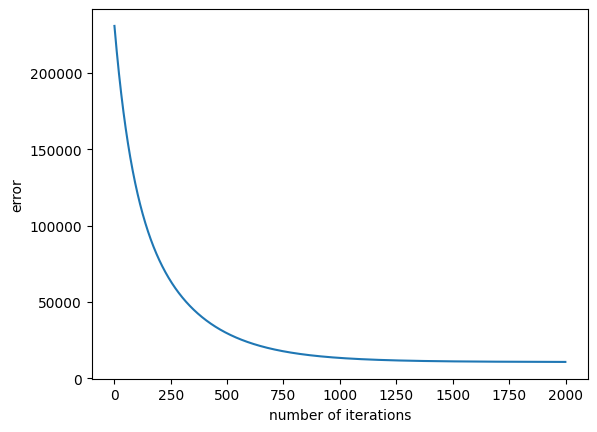

In [109]:
coefficients,interceptor=gradient_descent(X,Y)

In [110]:
print("Coefficients:",coefficients)
print("Interceptor:",interceptor)

Coefficients: [ 72.1   65.45  70.75 103.43]
Interceptor: 362.83163056596885


In [111]:
# Predict function
def predict(inp):
    Y_predicted=[]
    for i in range(len(inp)):
        Y_predicted.append(coefficients@inp[i]+interceptor)
    return np.array(Y_predicted)

In [112]:
Y_predicted=predict(X)

In [113]:
# Compare predicted result with actual value
df_pred=pd.DataFrame()
df_pred["y_actual"]=Y
df_pred["y_predicted"]=np.round(Y_predicted,1)
df_pred

,y_actual,y_predicted
0,242.0,364.8
1,290.0,412.7
2,340.0,436.3
3,363.0,461.0
4,430.0,501.8
...,...,...
150,12.2,-157.3
151,13.4,-157.4
152,12.2,-154.3
153,19.7,-75.3


### GD performance metrics

In [114]:
calculateModelMetrics(Y, Y_predicted)

Mean squared error =  10691.285852747367
Root Mean squared error =  103.39867432780446
Variance score =  0.889940945201078


***

## Stochastic gradient design

**Lets define the needed functions**

In [115]:
# Function to predict the value of y at that sample point
def predicted_y(coefficient,x,intercept):
    return coefficient@x+intercept
    

# Error function to find the error at one sample point
def loss(y,y_predicted):
    n=X.shape[0]
    s=(y-y_predicted)**2
    return (1/n)*s

# Derivative of error w.r.t coefficient
def dldw(x,y,y_predicted):
    n=X.shape[0]
    s=-x*(y-y_predicted)
    return (2/n)*s
    

# Derivative of error w.r.t intercept
def dldb(y,y_predicted):
    n=X.shape[0]
    s=-(y-y_predicted)
    return (2/n) * s
 
        
# stochastic gradient function
def stochastic_gradient_descent(x,y):
    coefficient_vector=np.random.randn(x.shape[1])
    intercept=0
    epoch = 2000
    n = len(x)
    linear_loss=[]
    learning_rate = 0.001
    
    for i in range(epoch):
        
        for j in range(n):
            random_index = np.random.randint(0,n-1)
            
            # Find random x and y
            x_sample = x[random_index] 
            y_sample = y[random_index]
            y_predicted = predicted_y(coefficient_vector,x_sample,intercept)
            
            coefficient_vector = coefficient_vector - learning_rate *dldw(x_sample,y_sample,y_predicted) 
            intercept = intercept - learning_rate * dldb(y_sample,y_predicted)
            
        linear_loss.append(loss(y_sample,y_predicted))    
        
        
    plt.plot(np.arange(1,epoch),linear_loss[1:])
    plt.xlabel("number of iterations")
    plt.ylabel("error")
    
    return coefficient_vector,intercept

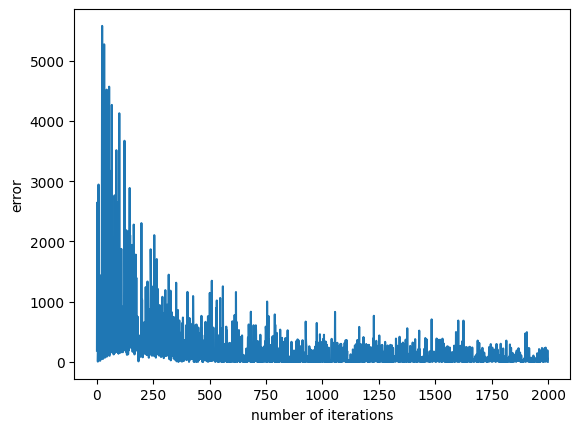

In [116]:
coefficients,interceptor=stochastic_gradient_descent(X,Y)

In [117]:
print("Coefficients:",coefficients)
print("Interceptor:", interceptor)

Coefficients: [ 72.59  64.78  70.79 105.13]
Interceptor: 362.08414790181786


In [118]:
Y_predicted=predict(X)

In [119]:
# Compare predicted result with actual value
df_pred=pd.DataFrame()
df_pred["y_actual"]=Y
df_pred["y_predicted"]=np.round(Y_predicted,1)
df_pred

,y_actual,y_predicted
0,242.0,363.7
1,290.0,411.8
2,340.0,435.8
3,363.0,460.3
4,430.0,501.7
...,...,...
150,12.2,-160.9
151,13.4,-161.0
152,12.2,-158.0
153,19.7,-78.2


### SGD performance metrics

In [120]:
calculateModelMetrics(Y, Y_predicted)

Mean squared error =  10685.437282207555
Root Mean squared error =  103.37038880747018
Variance score =  0.890001152004488


***

## Mini batch gradient design

**Lets define the needed functions**

In [121]:
# Function to predict the target variable
def predicted_y(coefficients,x,intercept):
    y_predicted=[]
    for i in range(len(x)):
        y_predicted.append(coefficients@x[i]+intercept)
    return np.array(y_predicted)
    

# Error function 
def error(y,y_predicted):
    n=len(y)
    s=0
    for i in range(n):
        s+=(y[i]-y_predicted[i])**2
    return (1/X.shape[0])*s

#derivative of error w.r.t coefficient
def dldw(x,y,y_predicted):
    s=0
    n=len(y)
    for i in range(n):
        s+=-x[i]*(y[i]-y_predicted[i])
    return (2/X.shape[0])*s
    

# derivative of error w.r.t intercept
def dldb(y,y_predicted):
    n=len(y)
    s=0
    for i in range(len(y)):
        s+=-(y[i]-y_predicted[i])
    return (2/X.shape[0]) * s

# Mini batch gradient function
def mini_batch_gradient_descent(x,y):
    coefficient_vector=np.random.randn(x.shape[1])
    intercept=0
    epoch = 500
    n = len(x)
    linear_loss=[]
    learning_rate = 0.01
    n_iter=[]
    count=1
    batch_size=15
    for i in range(epoch):
        
        for j in range(int(n/batch_size)):
            random_index=np.random.choice(x.shape[0],batch_size,replace=False)
            x_sample = x[random_index]
            y_sample = y[random_index]
            y_predicted = predicted_y(coefficient_vector,x_sample,intercept)
            
            coefficient_vector = coefficient_vector - learning_rate *dldw(x_sample,y_sample,y_predicted) 
            intercept = intercept - learning_rate * dldb(y_sample,y_predicted)
            
        linear_loss.append(error(y_sample,y_predicted)) 
        
        
    plt.plot(np.arange(1,epoch),linear_loss[1:])
    plt.xlabel("number of iterations")
    plt.ylabel("error")
    
    return coefficient_vector,intercept

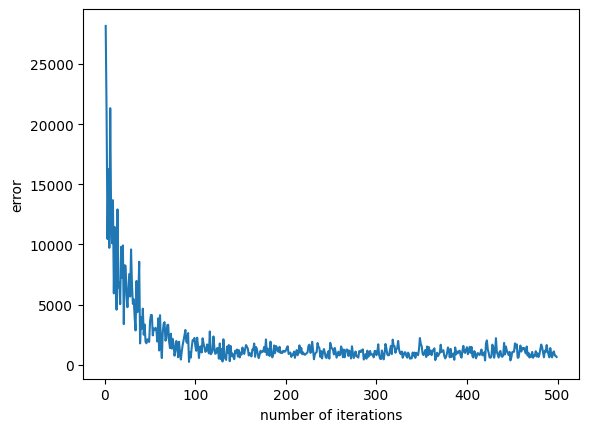

In [122]:
coefficients,interceptor=mini_batch_gradient_descent(X,Y)

In [123]:
print("Coefficients:",coefficients)
print("Interceptor:", interceptor)

Coefficients: [ 70.21  51.4   66.43 121.24]
Interceptor: 370.80052230694764


In [124]:
Y_predicted=predict(X)

In [125]:
# Compare predicted result with actual value
df_pred=pd.DataFrame()
df_pred["y_actual"]=Y
df_pred["y_predicted"]=np.round(Y_predicted,1)
df_pred

,y_actual,y_predicted
0,242.0,367.6
1,290.0,415.7
2,340.0,443.7
3,363.0,461.8
4,430.0,509.4
...,...,...
150,12.2,-148.4
151,13.4,-150.3
152,12.2,-147.7
153,19.7,-62.8


### Mini batch gradient descent model performance metrics

In [126]:
calculateModelMetrics(Y, Y_predicted)

Mean squared error =  10446.21894279772
Root Mean squared error =  102.20674607283865
Variance score =  0.8924637317810122
